# Handling missing data

Handling missing data is a critical aspect of data preprocessing in various fields such as statistics, machine learning, and data analysis. Missing data refers to the absence of values in a dataset that should ideally be present. There are several common approaches to handling missing data:

1. **Deletion**: This involves removing rows or columns with missing values. 

   -apply CCA when our data is missing completing at reandom 
   
   -when our data less then 5% data is missing then we remove this type of data. 
   
   -Disadvantage is when using our model in prediction the models will not know how to handle missing data
   
   It can be done in two ways:
   - **Listwise deletion (complete case analysis)**: Deletes entire rows with any missing values.
   - **Pairwise deletion**: Uses available data for each analysis, omitting missing values only for specific calculations.

2. **Imputation**: Imputation involves replacing missing values with substituted values. Some common imputation methods include:
    Absolutely! Let's delve into the main concepts of univariate and multivariate imputation methods:


**Univariate**: Refers to the analysis or manipulation of a single variable in isolation, without considering the relationships with other variables. Univariate methods focus solely on characteristics of individual variables.

**Multivariate**: Involves the analysis or manipulation of multiple variables simultaneously, taking into account the relationships between them. Multivariate methods consider interactions and dependencies between variables to provide a more comprehensive understanding of the data.


a. **Univariate Imputation**:

-apply CCA when our data is missing completing at reandom 
   
   -when our data less then 5% data is missing then we  this type of data.
   
   - **Numeric Variables**: 
     - **Mean Imputation**: Replace missing numeric values with the mean of the observed values for that variable.
     
     if distribution of data is normal foam then we use mean 
     
     - **Median Imputation**: Similar to mean imputation but uses the median instead of the mean.
     
     if distribution of data is not normal foam then we use median
     
     - **Random Imputation**: Assign random values from the observed values distribution to missing entries.
   - **Categorical Variables**:
     - **Mode Imputation**: Replace missing categorical values with the mode (most frequent category) of the observed values.
     - **Missing Indicator**: Create a new binary variable indicating whether the value was missing or not, and then apply mode imputation.

b. **Multivariate Imputation**:
   - **KNN Imputer (K-Nearest Neighbors)**: 
     - This method estimates missing values based on the values of other variables. For each missing value, it identifies the k nearest neighbors (cases with values for the variable) and imputes the missing value based on their values.
   - **Iterative Imputer**: 
     - This method models each feature with missing values as a function of other features and uses that estimate for imputation. It iterates over each feature with missing values and uses regression techniques to estimate the missing values based on other features.
     
     
     Today we work on univariate type of missing data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:

df = pd.read_csv('/kaggle/input/titanic-toy-1-csv-handling-missing-data/titanic_toy (1).csv')

In [3]:
df.sample(5)

,Age,Fare,Family,Survived
804,27.0,6.9750,0,1
601,NaN,7.8958,0,0
333,16.0,18.0000,2,0
857,51.0,26.5500,0,1
648,NaN,7.5500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [8]:

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_Age = df['Age'].mean()
median_Age = df['Age'].median()

mean_Fare = df['Fare'].mean()
median_Fare = df['Fare'].median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna(median_Age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_Age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_Fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_Fare)

In [12]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
886,27.0,13.0000,0,27.0,27.0,13.0000,13.0000
554,22.0,7.7750,0,22.0,22.0,7.7750,7.7750
54,65.0,61.9792,1,65.0,65.0,61.9792,61.9792
238,19.0,10.5000,0,19.0,19.0,10.5000,10.5000
509,26.0,56.4958,0,26.0,26.0,56.4958,56.4958


In [13]:
#when we apply mean median the check varience of data if changes or nh large then this is batter is changes are large then this is not batter  

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  162.3385298533084
Age Variance after mean imputation:  161.81386645586778
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.098181126128
Fare Variance after mean imputation:  2324.2440261086986


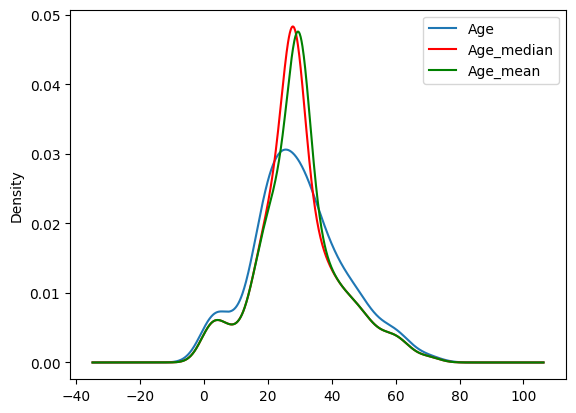

In [16]:
#In this plot our data hove large change so this is not batter 
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

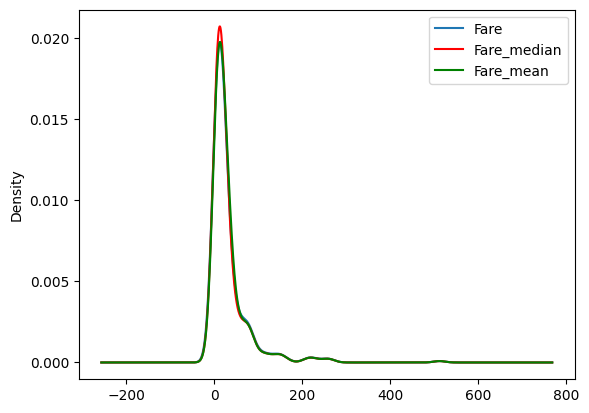

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026


In [19]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000


<Axes: >

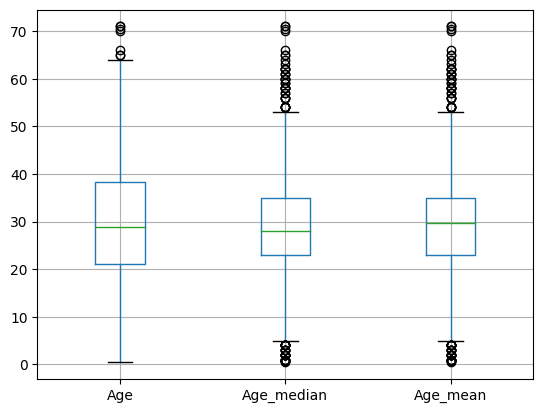

In [20]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

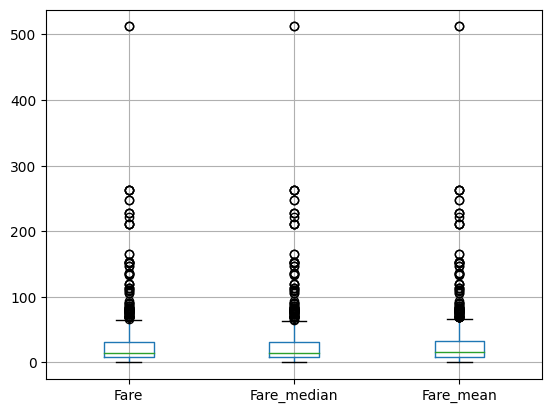

In [21]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

at the end we observed mean median is not batter for Age column 

# Using Sklearn

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [25]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [27]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# arbitrary-value-imputation
Arbitrary value imputation is a method used to replace missing values in a dataset with predetermined or arbitrary values. Instead of using statistical measures like mean, median, or mode, arbitrary value imputation involves selecting a specific value to fill in for missing data

Mostly we use for categorical data  and we replace 
with the word "missing",and we also use for numarical data and we replace with the help of -999 or -1 etc mean data is not exist in dataset

Disadvantage or today all method our data varience and correlation change 

In [29]:
df = pd.read_csv('/kaggle/input/titanic-toy-1-csv-handling-missing-data/titanic_toy (1).csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [32]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [33]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


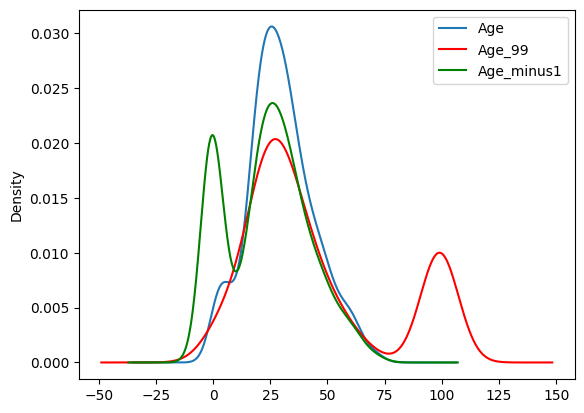

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

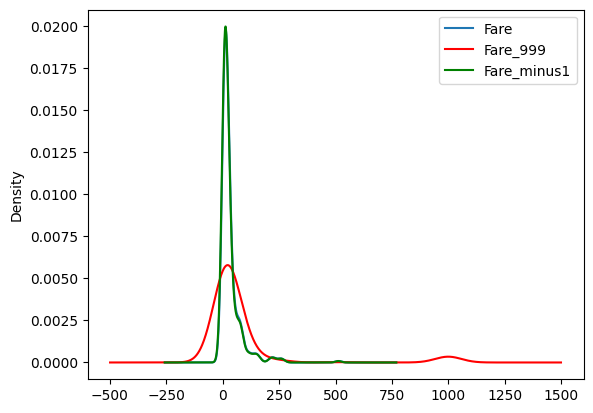

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:

X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [37]:

X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


# Using Sklearn


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [39]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [40]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [41]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_


array([99.])

In [43]:
trf.named_transformers_['imputer2'].statistics_


array([999.])

In [44]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [45]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])